[View in Colaboratory](https://colab.research.google.com/github/jrstevenjlab/ColaboratoryAtomicLab/blob/master/SingleSlit.ipynb)

The goal of the excercise is to fit the function 

$$I(x) = B + I_0 \frac{(\sin (\frac{\pi a}{\lambda}\frac{x}{\ell}))^2}{(\frac{\pi
a}{\lambda}\frac{x}{\ell})^2}$$

to your data for intensity as a function of position of the slit that you recorded in lab.  The parameters of the function are:

*   $\lambda$: wavelength of light source (670 nm for laser and 546 nm for bulb)
*   $\ell$: distance between double slit and viewing screen (you should have measured this)
*   B: background "pedestal" for laser data or "dark rate" for bulb data,
*   $I_0$: Intensity magnitude 
*   a: slit width distance
*   $x_0$: position of maximum intensity

By "fitting" the data we mean that the parameters of the model are allowed to vary until the curve defined by this function best match the data you've measured.  This is done by minimizing the $\chi^2$ which is a metric for comparing the model function to the observed data.  The $\chi^2$ is defined as

$$\chi^{2} = \sum_{i=0} \frac{(I_i - I_{model}(x_i))^2}{\sigma_{I_{i}}^2}$$

where the sum of $i$ is over each group's data points
*  $I_i$ are the individual intensity datapoints for a given position (y-axis value), 
*  $\sigma_{I_{i}}$ are the errors on the individual datapoints,
*  and $I_{model}(x_i)$ is the value of your model function for slit position $x_i$

The steps below describe the process that you should follow:

1.   Save your data to Google Drive in a file named DoubleSlitAll.  See example at [SingleSlitAll](https://docs.google.com/spreadsheets/d/1sVFujyO_ZW5sRZdgi-TraCwTuuZDrfRTSn5TwbxSa68/edit?usp=sharing)
2.   Run the fit code by pressing the "Play" button, which will cause a few things to happen:
> * You will be prompted to enter an authorization code, which appears in a new browser window (be sure to allow pop-ups).  This gives the Python code access to the files in your Google Drive.
> * The data will be plotted for all the groups in the figure below the code 
> * The `curve_fit` command in the code will find the "best fit" values for the paremeters of the model which gives the smallest value for the $\chi^2$ possible (ie. it "minimizes" the $\chi^2$).
> * The function $I_{model}(x)$ with these "best fit" parameters will be plotted in red overlayed with your data points
> * The values for the parameters are output as text below the figure, along with the uncertainties on those parameters
> * The $\chi^2$ and # DOF will also be output to determine the quality of the fit
3.   To switch between the laser (Photodiode) data and the bulb (PMT) data you need to make a few modifications:
> * Set the wavelength ($\lambda$) to the appropriate value for your data by commenting/ucommenting a line
> * Set y = ybulb and ey = eybulb (or vice versa) to use a given dataset under 'CHOOSE YOUR DATA HERE!'
> * Set the initial parameters of your fit for B and $I_0$ (the first 2 parameters in the list) to match the scale of the y-axis for your datapoints
> * Change axes labels appropriately

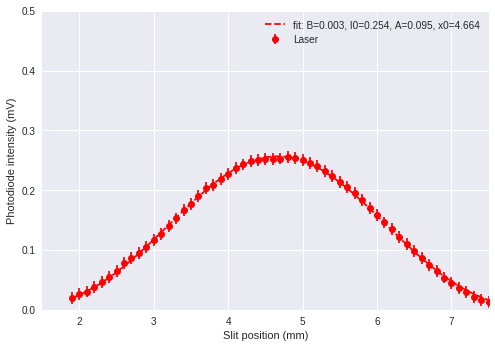

Model parameters:
B   = 0.003244142452290119  +/-  0.00485181520482939
I0  = 0.2535591745701079  +/-  0.004744248870091086
A   = 0.09507670931736847  +/-  0.0021443377426946207
x0  = 4.663737621062812  +/-  0.014592747596437132

Fit quality:
chisq = 3.2387743621107874 dof = 58


In [13]:
# import modules needed for data analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# import modules for reading data from Google Sheets
!pip install --upgrade -q gspread
import gspread
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

# function for detected intensity vs position
def IntensityModel(x, B, I0, A, x0):
  L=500 # distance between slits in (mm)
  #l=546e-6 # green bulb wavelength (mm)
  l=670e-6 # laser wavelength (mm)
  C=np.pi/(l*L)
  return B + I0 * np.power(np.sin(C*A*(x-x0))+1e-9,2.0) / np.power((C*A*(x-x0))+1e-9,2.0)

########################
# LOAD YOUR DATA HERE! #
########################

# Open our new sheet and read some data.  Upload the file to Google Drive main folder for access
worksheet = gc.open("SingleSlitAll").sheet1

# Wednesday afternoon data
x=worksheet.col_values(1,'UNFORMATTED_VALUE')[1:] # first column is position (x-axis variable)
ylaser=worksheet.col_values(2,'UNFORMATTED_VALUE')[1:] # second column is laser data (y-axis variable)
ybulb=worksheet.col_values(3,'UNFORMATTED_VALUE')[1:] # thrid column is bulb data (y-axis variable)

# check that data from spreadsheet is in the right format
#print(x)
#print(ylaser)
#print(ybulb)

eylaser_value = 0.01 # set this value to what you determined for errors in lab
eylaser = np.repeat(eylaser_value, len(ylaser)) 
eybulb = np.sqrt(ybulb)

# replace laser with bulb below to switch from 2 different columns of data
y = ylaser
ey = eylaser

# plot the data on a new figure
plt.figure() # create new figure for plotting
plt.errorbar(x, y, ey, fmt='or', label="Laser") # plot intensity vs position
plt.axis([1.5, 7.5, 0, 0.5])  # set axes [xmin, xmax, ymin, ymax]
plt.xlabel('Slit position (mm)') # set x-axis label
plt.ylabel('Photodiode intensity (mV)') # set y-axis label 

################################
# SET INITIAL PARAMETERS HERE! #
################################
initialParameters = [0.01,1.200,0.085,4.78] # start with initial guess for fit parameters (B, I0, A, x0)

# fit the data
finalParameters, finalParameterErrors = curve_fit(IntensityModel, x, y, initialParameters, ey, True)

# show red curve for fit results and plot on top of the data
plt.plot(x, IntensityModel(x, *finalParameters), 'r--', label='fit: B=%5.3f, I0=%5.3f, A=%5.3f, x0=%5.3f' % tuple(finalParameters)) #
plt.legend()
plt.show()

# output fit parameter values and errors
print("Model parameters:")
print("B   =", finalParameters[0], " +/- ",np.sqrt(finalParameterErrors[0,0]))
print("I0  =", finalParameters[1], " +/- ",np.sqrt(finalParameterErrors[1,1]))
print("A   =", finalParameters[2], " +/- ",np.sqrt(finalParameterErrors[2,2]))
print("x0  =", finalParameters[3], " +/- ",np.sqrt(finalParameterErrors[3,3]))

# compare model function with obtained parameters to data to determine fit quality
IntensityModel_i = IntensityModel(x, *finalParameters)
deltaIntensity = y - IntensityModel_i # calculate difference between data and model
chisq = np.sum((deltaIntensity/ey)**2) # calculate chi^2 by summing over difference for all data points
dof = len(x) - len(finalParameters) # Degrees of Freedom = # data points - # parameters
print("\nFit quality:")
print("chisq =",chisq,"dof =",dof)